In [14]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [15]:
df=pd.read_csv('mtcars.csv')
x=df.drop(columns=['model','mpg']) # those columns are not suppose to be used in model they should be drop before apply the method
y=df['mpg']

# testing in simple method
model = LinearRegression()
model.fit(x,y)
print("the R square  is:",model.score(x,y))
print('the coef is:',model.coef_)
print('the intercept is: ',model.intercept_)

the R square  is: 0.8690157644777647
the coef is: [-0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393  0.82104075
  0.31776281  2.52022689  0.65541302 -0.19941925]
the intercept is:  12.30337415599627


In [34]:
ypred=model.predict(x)
residual=y-ypred
np.mean(residual)

-425.3101693659443

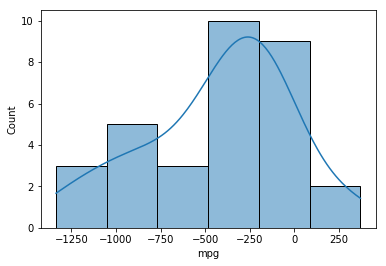

In [35]:
sns.histplot(residual,kde=True)

In [16]:
# devide data into 80 per training and 20 per testting

xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2)

model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.8778581110713963

In [17]:
ypred = model.predict(xtest)


In [18]:
data=pd.DataFrame({"Actual":ytest,"predictions":ypred})
print(data)


    Actual  predictions
11    16.4    13.122332
26    26.0    27.158859
0     21.0    23.242977
9     19.2    17.798623
2     22.8    26.438088
14    10.4    13.799638
19    33.9    28.825178


In [29]:
residual=ytest-ypred
residual

11    3.277668
26   -1.158859
0    -2.242977
9     1.401377
2    -3.638088
14   -3.399638
19    5.074822
Name: mpg, dtype: float64

In [28]:
import numpy as np
np.mean(residual)

-0.09795633535672645

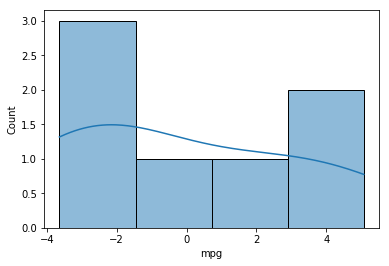

In [31]:
sns.histplot(residual,kde=True)

In [21]:
s=StandardScaler()
X_scales=s.fit_transform(x)
model.fit(X_scales,y)
model.score(X_scales,y)

0.8690157644777647

In [23]:
m=MinMaxScaler()
X_norm=m.fit_transform(x)
model.fit(X_norm,y)
model.score(X_norm,y)

0.8690157644777647

In [6]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

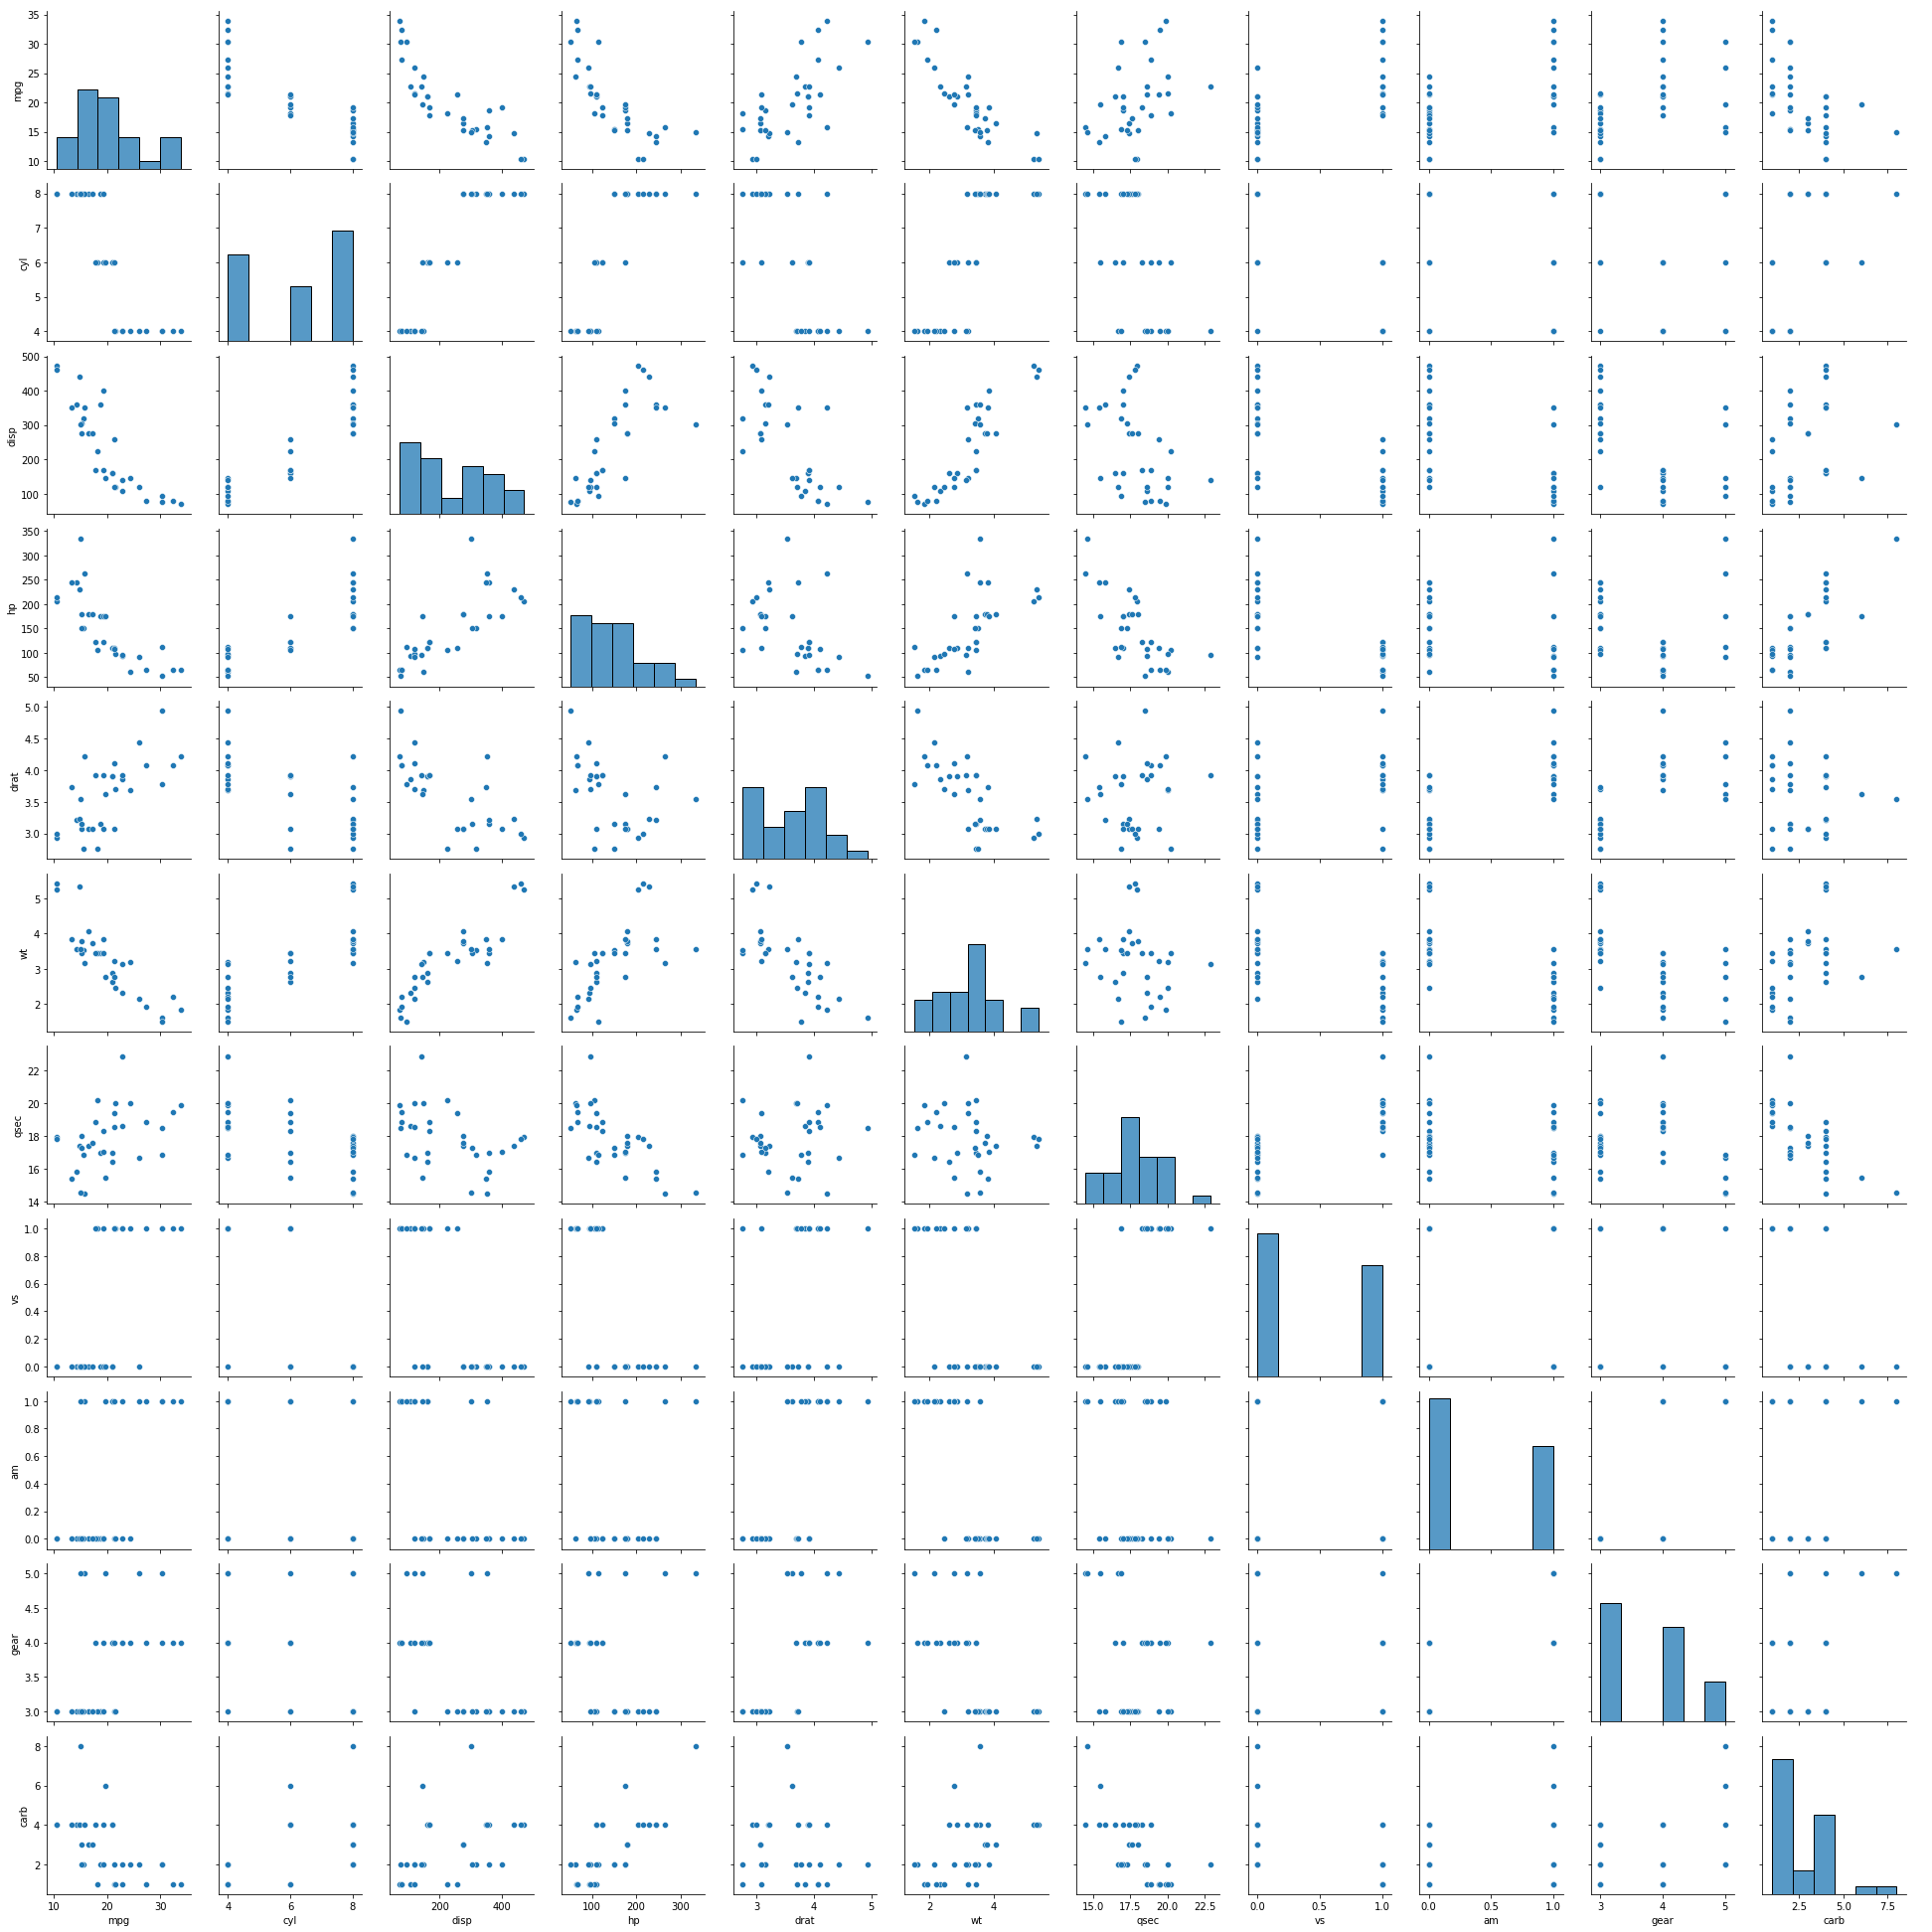

In [7]:
sns.pairplot(data=df)

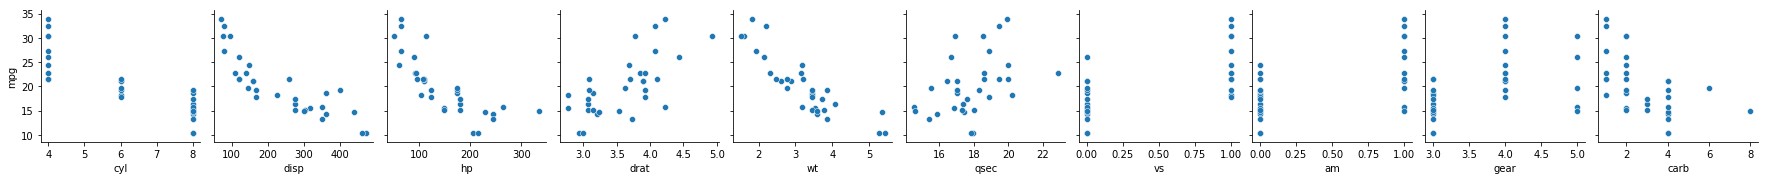

In [8]:
sns.pairplot(data=df,x_vars=['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am','gear', 'carb'],y_vars='mpg')

In [9]:
df.corr()  # it gives relation between the columns

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


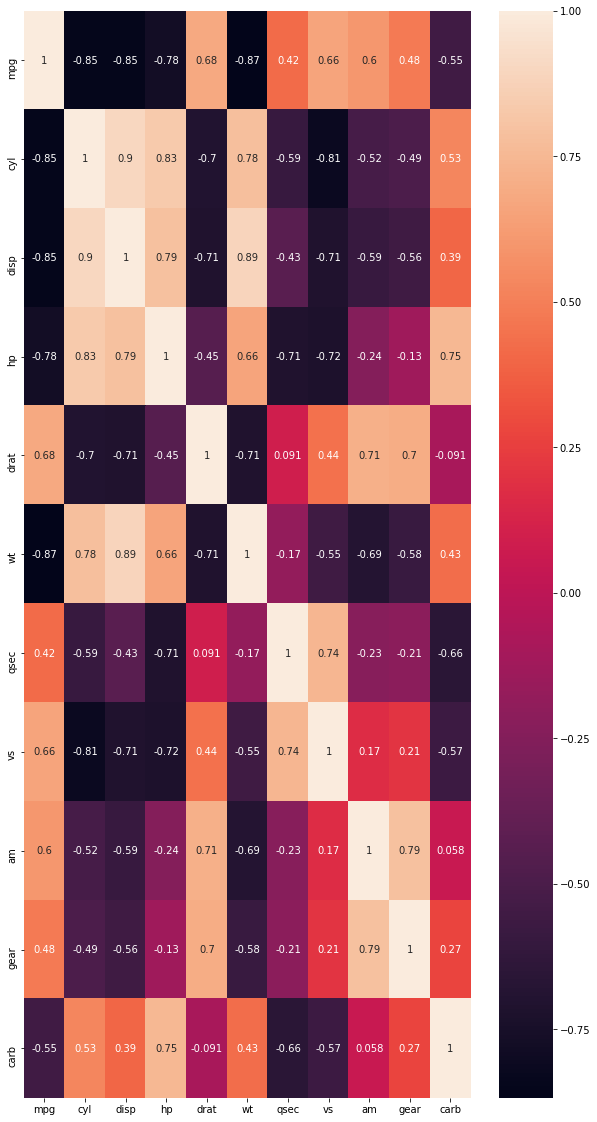

In [12]:
fig=plt.figure(figsize=(10,20))
sns.heatmap(df.corr(),annot=True)

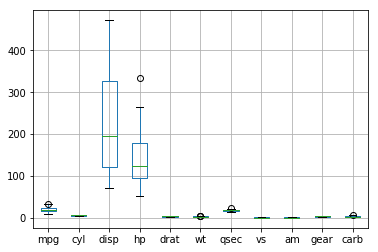

In [36]:
df.boxplot()

# for removing the outliers from all bar used IQR method

In [37]:
"""q1 - first quartile
    q3 -  last quartile
     IQR - inter quartile raneg
      IQR= Q3-Q1
      
      range = q1-1.5*iqr to q3+1.5*iqr"""

'q1 - first quartile\n    q3 -  last quartile\n     IQR - inter quartile raneg\n      IQR= Q3-Q1\n      \n      range = q1-1.5*iqr to q3+1.5*iqr'

In [38]:
Q1= df.quantile(0.25)

mpg      15.42500
cyl       4.00000
disp    120.82500
hp       96.50000
drat      3.08000
wt        2.58125
qsec     16.89250
vs        0.00000
am        0.00000
gear      3.00000
carb      2.00000
Name: 0.25, dtype: float64

In [42]:
Q2= df.quantile(0.50)
Q2

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
Name: 0.5, dtype: float64

In [43]:
Q3= df.quantile(0.75)
Q3

mpg      22.80
cyl       8.00
disp    326.00
hp      180.00
drat      3.92
wt        3.61
qsec     18.90
vs        1.00
am        1.00
gear      4.00
carb      4.00
Name: 0.75, dtype: float64

In [44]:
IQR=Q3-Q1
print(IQR)

mpg       3.600
cyl       2.000
disp    129.700
hp       57.000
drat      0.225
wt        0.285
qsec      1.190
vs        1.000
am        1.000
gear      0.000
carb      2.000
dtype: float64


# False=> not outlier and True=> outlier

In [47]:
(df<Q1-IQR*1.5) | (df>Q3+IQR*1.5)

,am,carb,cyl,disp,drat,gear,hp,model,mpg,qsec,vs,wt
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,False,False
5,False,False,False,False,True,True,False,False,False,False,False,False
6,False,False,False,False,True,True,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [55]:
#removing the outliers
new_df=df[~((df<Q1-IQR*1.5) | (df>Q3+IQR*1.5)).any(axis=1)]


In [56]:
new_df.shape

(3, 12)

In [57]:
df.shape

(32, 12)

In [58]:
new_df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [ ]:
x=df['']